In [26]:
import numpy as np
import pandas as pd

In [93]:
df=pd.read_csv('/Users/guillaumelecronier/Documents/NUS/Master thesis/IPS_BLE_MV/IPS/fingerprint/errors_fingerprint.csv')
#df=pd.read_csv('/Users/guillaumelecronier/Documents/NUS/Master thesis/IPS_BLE_MV/IPS/errors_trilateration.csv')

In [94]:
df.head()

,x_pred,y_pred,x_true,y_true
0,3.553333,4.126667,1,3
1,1.253333,3.306667,1,3
2,2.946667,4.860000,1,3
3,2.273333,4.200000,1,3
4,2.900000,5.433333,1,3


In [95]:
df['error']=df.apply(lambda x: np.sqrt((x['x_true']*0.6-x['x_pred']*0.6)**2+(x['y_true']*0.6-x['y_pred']*0.6)**2),axis=1)

In [96]:
np.percentile(df['error'],95)

3.296113029109593

In [97]:
df['error'].mean()

1.260748059729644

In [98]:
df['error'].max()

3.66580959680123

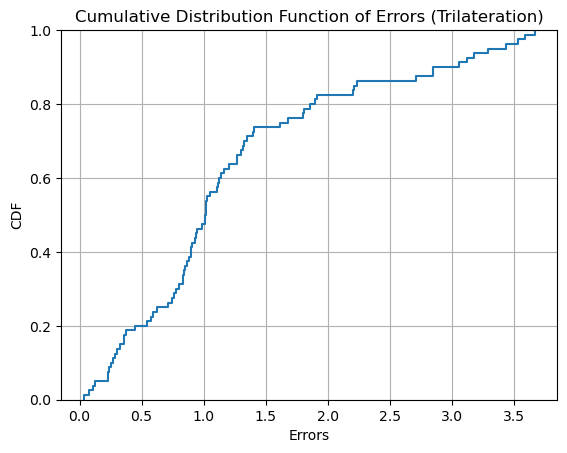

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the CDF
sns.ecdfplot(data=df['error'])
plt.xlabel('Errors')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Errors (Trilateration)')
plt.grid(True)
plt.savefig('cdf_fingerprint.png')
plt.show()

In [100]:
FAN_POSITION=(7,14.5)
def angle_diff(value, true_value):
    if value is None:
        return None
    return np.rad2deg(np.abs(np.arctan2(FAN_POSITION[1]-true_value[1],FAN_POSITION[0]-true_value[0])-np.arctan2(FAN_POSITION[1]-value[1],FAN_POSITION[0]-value[0])))
df['error_angle']=df.apply(lambda x: angle_diff((x['x_pred']*0.6,x['y_pred']*0.6),(x['x_true']*0.6,x['y_true']*0.6)),axis=1)


In [101]:
df['error_angle'].mean()

4.473000058121968

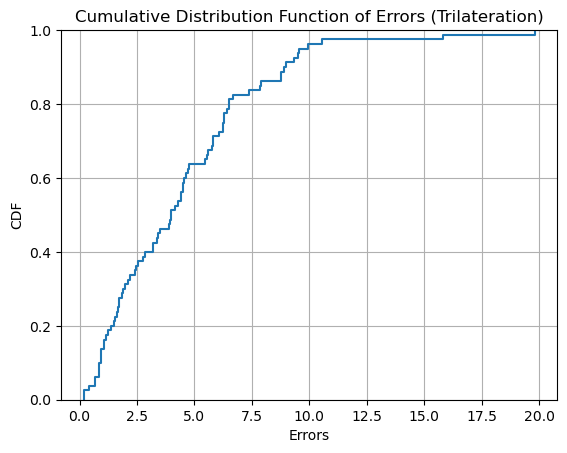

In [102]:
sns.ecdfplot(data=df['error_angle'])
plt.xlabel('Errors')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Errors (Trilateration)')
plt.grid(True)
plt.savefig('cdf_angle_fingerprint.png')
plt.show()

In [103]:
import matplotlib.pyplot as plt
room_width = 12
room_length = 17
camera_position=(2.5, 16)
average_df=df.groupby(['x_true','y_true']).mean().reset_index()





In [104]:
average_df.head(10)

,x_true,y_true,x_pred,y_pred,error,error_angle
0,1,3,2.577333,4.110000,1.214977,2.627239
1,1,8,2.822000,7.500000,1.160935,5.447399
2,5,16,5.048000,15.028000,0.622497,3.573127
3,7,9,6.734000,11.328667,1.458119,3.922584
4,7,12,7.017333,12.303333,0.344821,1.252360
5,9,9,8.950667,4.066000,2.987422,2.654148
6,10,11,8.028000,11.890000,1.354263,9.481906
7,12,11,10.441333,11.153333,0.942950,6.825238


In [105]:
average_df.head(10)

,x_true,y_true,x_pred,y_pred,error,error_angle
0,1,3,2.577333,4.110000,1.214977,2.627239
1,1,8,2.822000,7.500000,1.160935,5.447399
2,5,16,5.048000,15.028000,0.622497,3.573127
3,7,9,6.734000,11.328667,1.458119,3.922584
4,7,12,7.017333,12.303333,0.344821,1.252360
5,9,9,8.950667,4.066000,2.987422,2.654148
6,10,11,8.028000,11.890000,1.354263,9.481906
7,12,11,10.441333,11.153333,0.942950,6.825238


In [106]:
average_positions=average_df[['x_true','y_true']].astype(int).to_numpy()
true_values=average_df[['x_pred','y_pred']].astype(int).to_numpy()

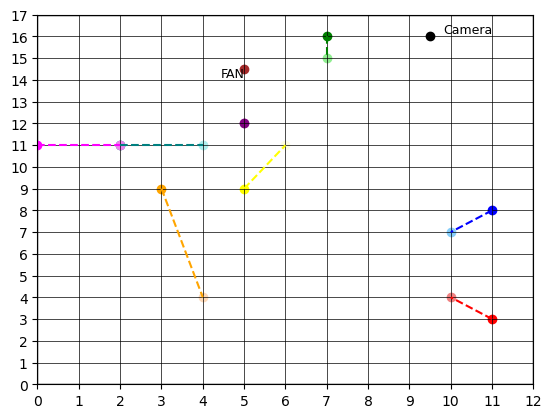

In [108]:



plt.clf()  # clear the figure

#Display fan position
plt.gca().add_patch(plt.Rectangle((0, 0), room_width, room_length, fill=None))
plt.scatter(room_width-FAN_POSITION[0],FAN_POSITION[1], color='brown')
plt.text(int(room_width-FAN_POSITION[0]), int(FAN_POSITION[1]), "FAN", fontsize=9, ha='right', va='bottom')
# Plot the room as a rectangle

plt.scatter(room_width-camera_position[0],camera_position[1], color='black')
plt.text(int(room_width-camera_position[0]+2), int(camera_position[1]), "Camera", fontsize=9, ha='right', va='bottom')

colors = [('red', 'lightcoral'), ('blue', 'lightskyblue'), ('green', 'lightgreen'),('yellow','lightyellow'),('purple','plum'),('orange','peachpuff'),('teal','paleturquoise'),('magenta','violet')]
# Plot the current position of the marker

for (est, real), (color_dark, color_light) in zip(zip(average_positions, true_values), colors):
    est_tuple=(room_width-est[0],est[1])
    real_tuple=(room_width-real[0],real[1])
    plt.scatter(*real_tuple, color=color_light, label=f'Real {color_light}')
    plt.scatter(*est_tuple, color=color_dark, label=f'Estimated {color_dark}')
    
    plt.plot([room_width-est[0], room_width-real[0]], [est[1], real[1]], color=color_dark, linestyle='--')



#position_square[1]=room_length-position_square[1]

#plt.scatter(*position_square, color='green')

plt.xlim(0, room_width)
plt.ylim(0, room_length)
plt.xticks(range(room_width + 1))
plt.yticks(range(room_length + 1))
plt.grid(which='both', color='black', linewidth=0.5)
plt.savefig('prediction_error_finger.png')
plt.draw()